In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
wine = pd.read_csv("winequality-red.csv")

# Display the first few rows of the dataset
print(wine.head())

# Check the shape of the dataset
print(wine.shape)

# Check basic statistics of the features
print(wine.describe())

# Check for any missing values
print(wine.isnull().sum())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

<Axes: >

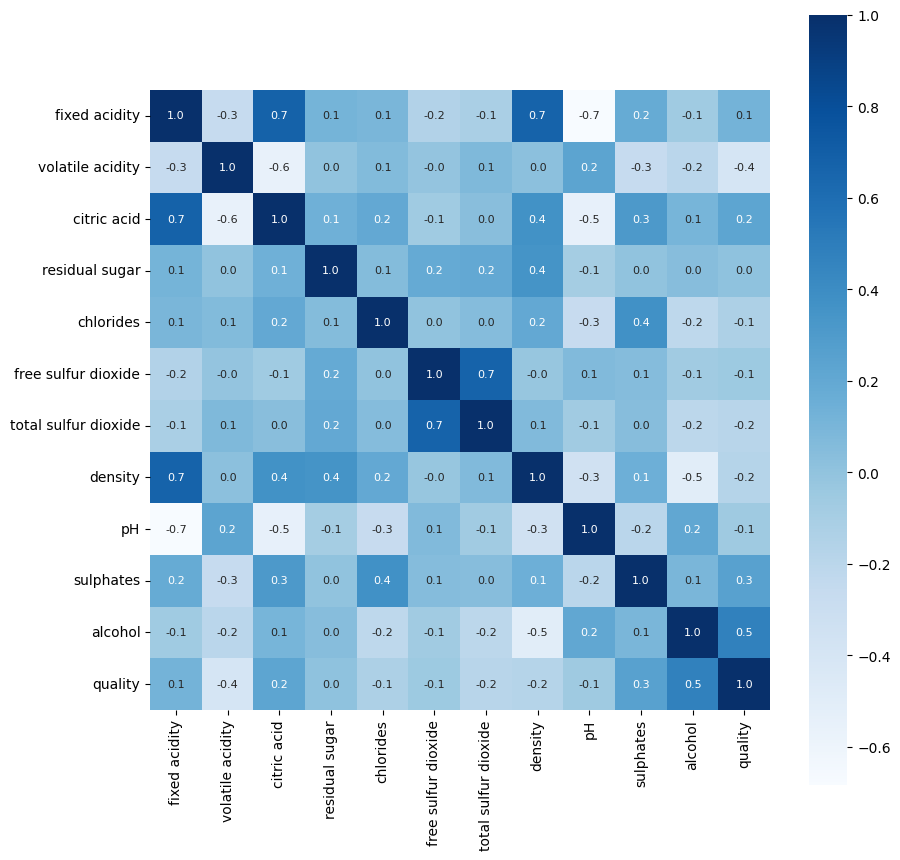

In [3]:
#corelation 
correlation = wine.corr()
#heatmap of correlation 
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True , square=True , fmt= '.1f' , annot = True , annot_kws ={'size':8}, cmap = 'Blues' )

In [4]:
# Separate features (X) and target variable (Y)
X = wine.drop('quality', axis=1)
Y = wine['quality']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)


LinearRegression()

In [5]:
# Make predictions on the test set
Y_test_prediction = model.predict(X_test)

# Calculate regression metrics
mean_squared_error_value = mean_squared_error(Y_test, Y_test_prediction)
r2_score_value = r2_score(Y_test, Y_test_prediction)

print(f"Mean Squared Error: {mean_squared_error_value}")
print(f"R2 Score: {r2_score_value}")


Mean Squared Error: 0.3900251439643168
R2 Score: 0.4031803412790682


In [6]:
# Sample input data for prediction
input_data = [7.8, 0.58, 0.02, 2, 0.073, 9, 18, 0.9968, 3.36, 0.57, 9.5]

# Convert the input data to a 2D array
input_data_array = np.array(input_data).reshape(1, -1)

# Predict quality score using the trained Linear Regression model
prediction = model.predict(input_data_array)

print(f"Predicted Quality Score: {prediction[0]}")


Predicted Quality Score: 5.3340570654180475


c:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


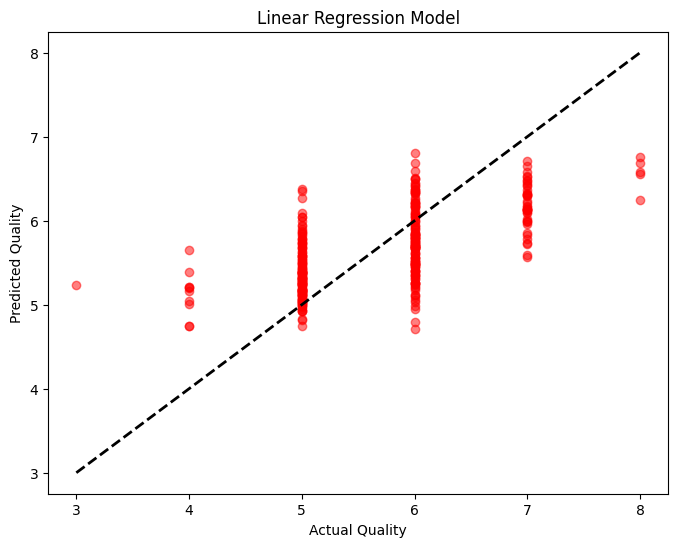

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_prediction, color='red', alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)  # Plotting the 45-degree line (perfect prediction)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Linear Regression Model")
plt.show()